# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from citipy import citipy
# Import API key
#from api_keys import weather_api_key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [72]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

In [116]:
url="http://api.openweathermap.org/data/2.5/weather?"

query_url=f"{url}appid={api_key}&q="
#response=requests.get(query_url+city+"&units=imperial").json()
#response

In [117]:
temp=[]
lat=[]
hum=[]
cloud=[]
wind=[]
max_temp=[]
print(f"Begining Data retrieval")
for city in cities:
    response_r=requests.get(query_url+city+"&units=imperial")
    response=response_r.json()
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        print(f"Procesing record {len(temp)}:{city}")
    except:
        print('Nothing')
        pass
    


Begining Data retrieval
Procesing record 1:upernavik
Procesing record 2:carnarvon
Procesing record 3:bethel
Procesing record 4:aripuana
Procesing record 5:hobyo
Procesing record 6:mataura
Procesing record 7:hobart
Nothing
Procesing record 8:qaanaaq
Procesing record 9:bengkulu
Procesing record 10:flinders
Procesing record 11:novouzensk
Procesing record 12:nishihara
Nothing
Procesing record 13:ushuaia
Procesing record 14:rikitea
Procesing record 15:leh
Procesing record 16:matalom
Procesing record 17:mantua
Procesing record 18:itarema
Procesing record 19:albany
Procesing record 20:noshiro
Procesing record 21:busselton
Procesing record 22:mwingi
Procesing record 23:zambezi
Procesing record 24:bandarbeyla
Nothing
Procesing record 25:chokurdakh
Procesing record 26:port blair
Procesing record 27:tudela
Procesing record 28:butaritari
Procesing record 29:vaini
Procesing record 30:reitz
Nothing
Procesing record 31:santa maria
Procesing record 32:chuy
Procesing record 33:tasiilaq
Procesing record

Procesing record 267:mitu
Procesing record 268:moron
Procesing record 269:valle de allende
Procesing record 270:constitucion
Procesing record 271:huarmey
Procesing record 272:kupang
Procesing record 273:stellenbosch
Procesing record 274:namibe
Procesing record 275:luganville
Procesing record 276:adrar
Procesing record 277:rocha
Procesing record 278:manicore
Procesing record 279:tommot
Procesing record 280:bowen
Procesing record 281:merauke
Procesing record 282:karratha
Procesing record 283:colares
Procesing record 284:pauini
Nothing
Procesing record 285:norwich
Procesing record 286:abha
Procesing record 287:yuzhno-sukhokumsk
Procesing record 288:filingue
Procesing record 289:henties bay
Nothing
Procesing record 290:cabedelo
Procesing record 291:praia
Procesing record 292:sao jose da coroa grande
Procesing record 293:muros
Procesing record 294:la sarre
Nothing
Procesing record 295:san andres
Procesing record 296:kushima
Procesing record 297:rapar
Procesing record 298:hofn
Procesing reco

Procesing record 532:havre-saint-pierre
Procesing record 533:haikou
Procesing record 534:guarapari
Procesing record 535:saint-francois
Procesing record 536:biak
Procesing record 537:assesse
Procesing record 538:garowe
Procesing record 539:acari
Procesing record 540:zhigansk
Procesing record 541:leningradskiy
Procesing record 542:isla mujeres
Procesing record 543:teguldet
Procesing record 544:coslada
Procesing record 545:rayadrug
Procesing record 546:seymchan
Procesing record 547:gornopravdinsk
Procesing record 548:petropavlovsk-kamchatskiy
Procesing record 549:keffi
Procesing record 550:naze
Procesing record 551:enumclaw
Procesing record 552:tahe
Procesing record 553:charleston
Procesing record 554:the valley
Procesing record 555:brumunddal
Procesing record 556:hervey bay
Procesing record 557:sebezh
Procesing record 558:vanavara
Procesing record 559:eirunepe
Procesing record 560:acapulco
Procesing record 561:yorosso
Procesing record 562:batagay


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
city_dict={"City":cities,
         "Latitude":lat,
         "Temp":temp,
         "Max Temp":max_temp,
         "Cloudiness":cloud,
         "Humidity":hum,
         "Wind":wind }
            
        
city_temp=pd.concat([pd.Series(v,name=k) for k,v in city_dict.items()],axis=1)
city_temp=city_temp.dropna()
city_temp

,City,Latitude,Temp,Max Temp,Cloudiness,Humidity,Wind
0,upernavik,72.79,0.57,0.57,100.0,94.0,7.96
1,carnarvon,-24.87,73.40,73.40,0.0,78.0,21.92
2,bethel,41.37,31.62,35.01,1.0,39.0,5.82
3,aripuana,-9.17,86.22,86.22,99.0,78.0,4.81
4,hobyo,5.35,78.73,78.73,16.0,74.0,19.30
...,...,...,...,...,...,...,...
557,orito,60.34,-19.39,-19.39,47.0,97.0,5.75
558,korla,-6.66,93.54,93.54,35.0,45.0,4.76
559,kanbe,16.86,82.40,82.40,5.0,69.0,6.93
560,tubruq,12.35,92.41,92.41,78.0,17.0,6.49


In [119]:
city_temp.to_csv('ouput_data_file')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature Plot')

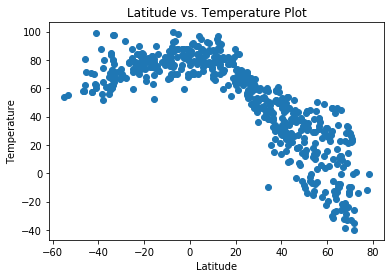

In [144]:
plt.scatter(lat,temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature Plot')

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

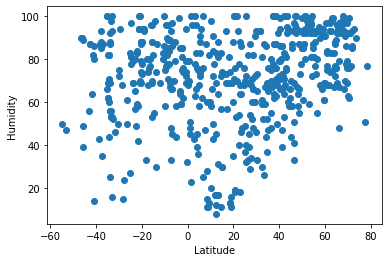

In [121]:
plt.scatter(lat,hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

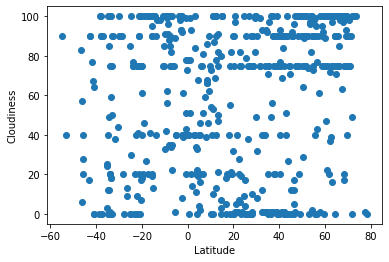

In [122]:
plt.scatter(lat,cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

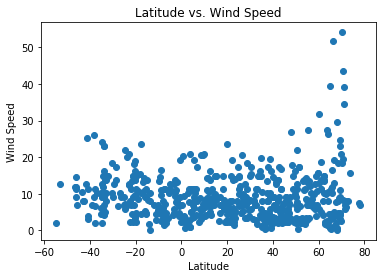

In [145]:
plt.scatter(lat,wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

## Linear Regression

In [124]:
# OPTIONAL: Create a function to create Linear Regression plots


In [125]:
# Create Northern and Southern Hemisphere DataFrames
city_north=city_temp[city_temp['Latitude']>=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8696268974204675


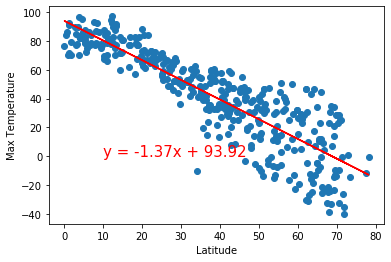

In [127]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.46560056102420605


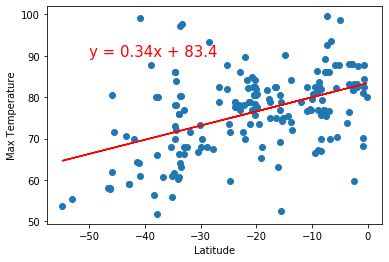

In [129]:
city_south=city_temp[city_temp['Latitude']<0]
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.4497039092428591


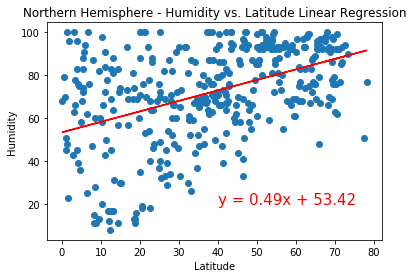

In [146]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.13748595145952422


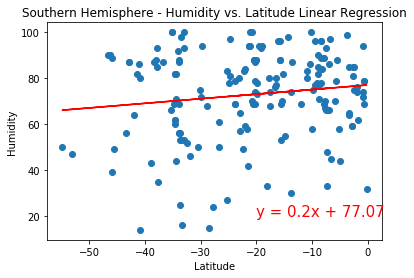

In [147]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.30270494991864766


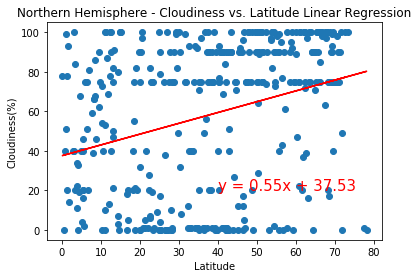

In [148]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.27207963599905727


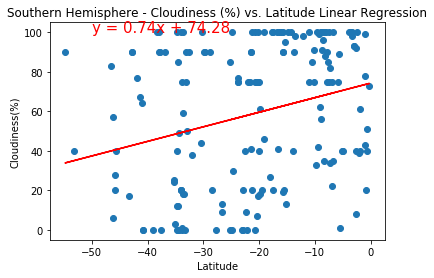

In [143]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.1636385460929408


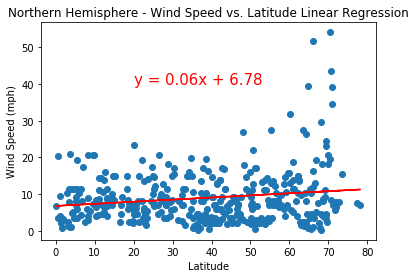

In [149]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Wind'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.23723352646000095


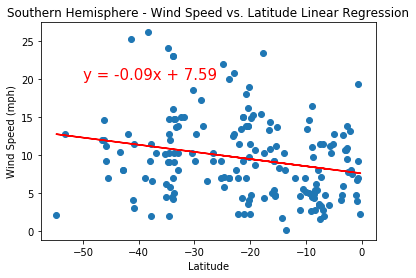

In [150]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Wind'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()